In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from google.colab import files

# **Introduction**

In [ ]:
#df = pd.read_csv('student-mat.csv', delimiter=';')
df = pd.read_csv('student-por.csv', delimiter=';')
#df = df.replace(to_replace='?',value= NaN)

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]
              age        Medu        Fedu  traveltime   studytime    failures  \
count  

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# **Pre-Processing Data**

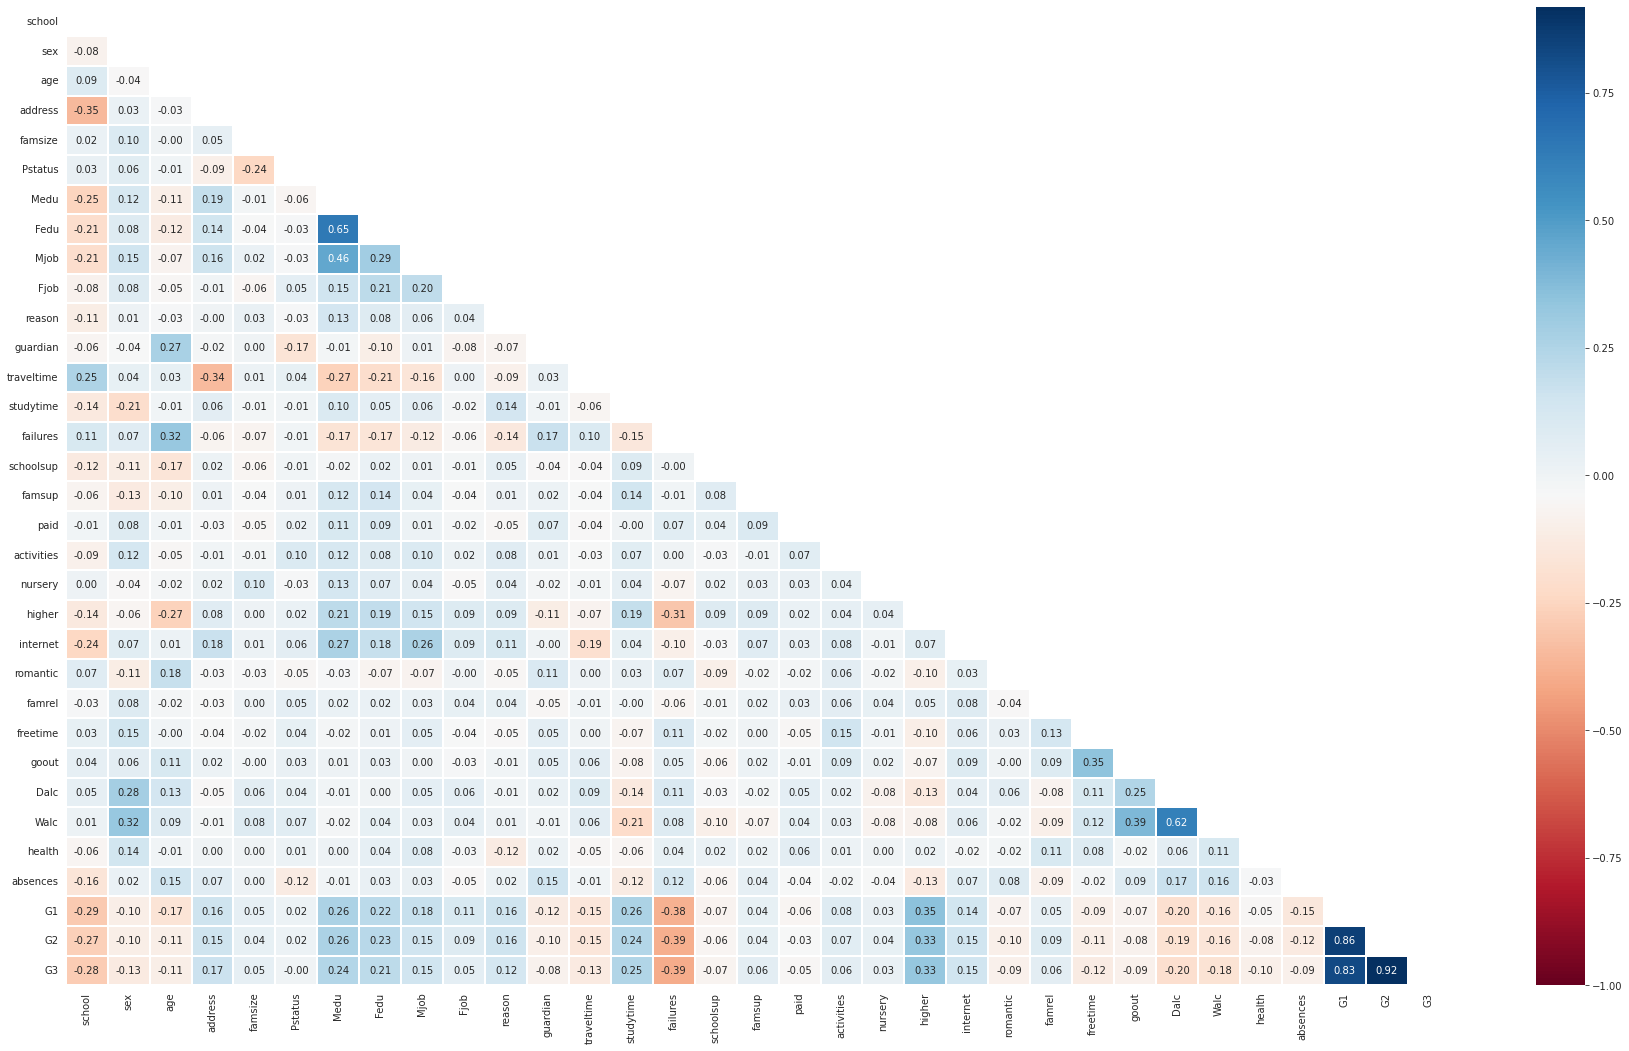

In [ ]:
pre_df = df.copy()
pre_df = pre_df.convert_dtypes()
columns = pre_df.select_dtypes(include=['string']).columns
oe = OrdinalEncoder()
pre_df[columns] = oe.fit_transform(pre_df[columns])
dataCorr = pre_df.corr(method = 'pearson')

#cmap = sn.diverging_palette(230, 20, as_cmap=True)
mask = np.zeros_like(dataCorr)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(31, 18))
    ax = sn.heatmap(dataCorr, 
                      mask=mask, linewidths = 1, vmin=-1, cmap= "RdBu", annot=True, fmt ='.2f')
# plt.figure(figsize = (25,25))
# sn.heatmap(dataCorr, annot= True, linewidth=0.5, linecolor = 'black', fmt = ".2f", cmap="RdBu" )


In [ ]:
bins = pd.IntervalIndex.from_tuples([(0, 9), (10, 11), (12, 13), (14, 15), (16, 20)], closed='both')
levels = ['fail', 'sufficient', 'satisfactory', 'good', 'excellent']
df['final_grade_evaluation'] = np.array(levels)[pd.cut(df['G3'], bins=bins).cat.codes]

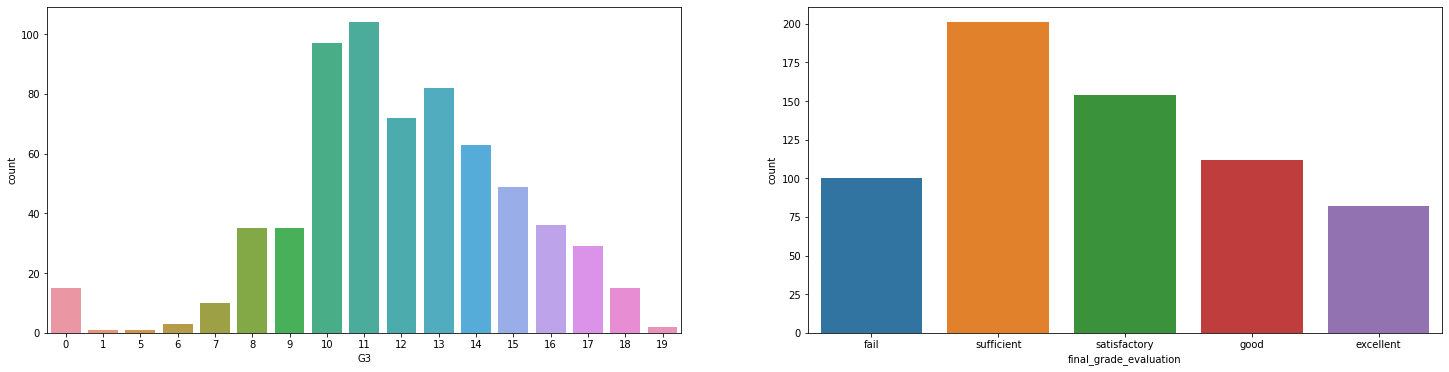

In [ ]:
nrows, ncols = 1, 2
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 6))
sn.countplot(data=df, x='final_grade_evaluation', ax=axes[1], order=levels)
sn.countplot(data=df, x='G3', ax=axes[0])

In [ ]:
df['final_grade_evaluation'].value_counts(normalize=True)*100

sufficient      30.970724
satisfactory    23.728814
good            17.257319
fail            15.408320
excellent       12.634823
Name: final_grade_evaluation, dtype: float64

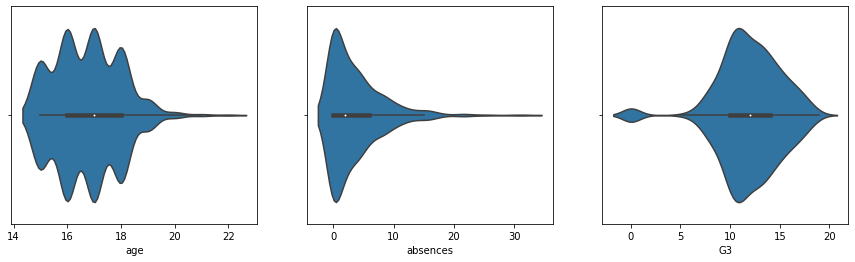

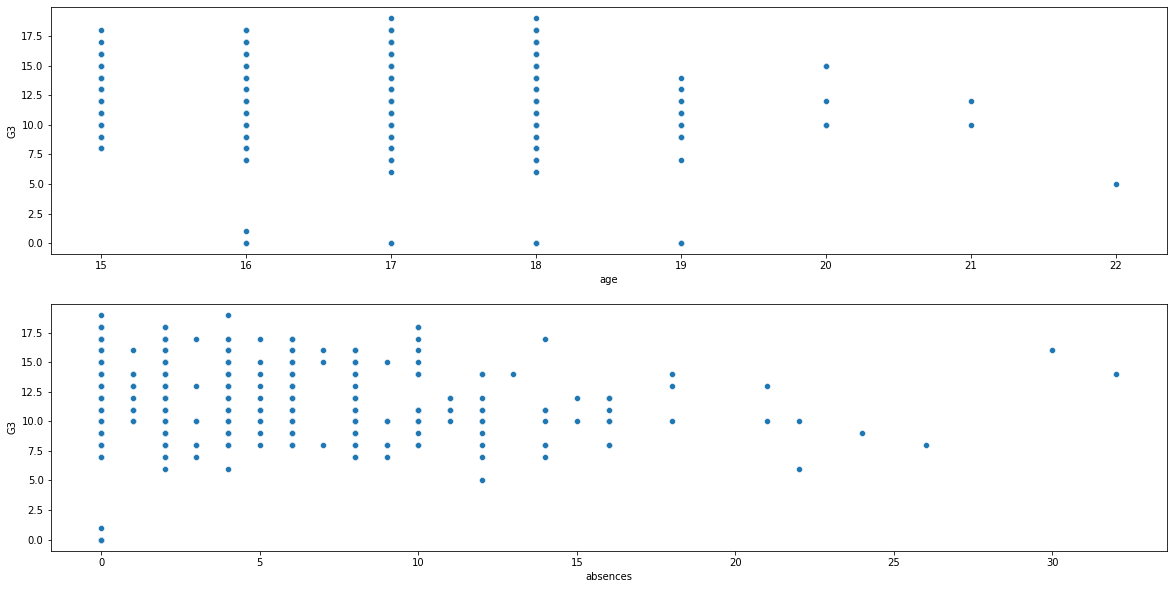

In [ ]:
non_cat_col = ['age', 'absences', 'G3']

nrows, ncols = 1, 3
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4))

for idx, col in enumerate(non_cat_col):
  ax = axes[idx]
  sn.violinplot(data=df, x=col, ax=ax)

nrows, ncols = 2, 1
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
sn.scatterplot(data=df, x='age', y='G3', ax=axes[0])
sn.scatterplot(data=df, x='absences', y='G3', ax=axes[1])

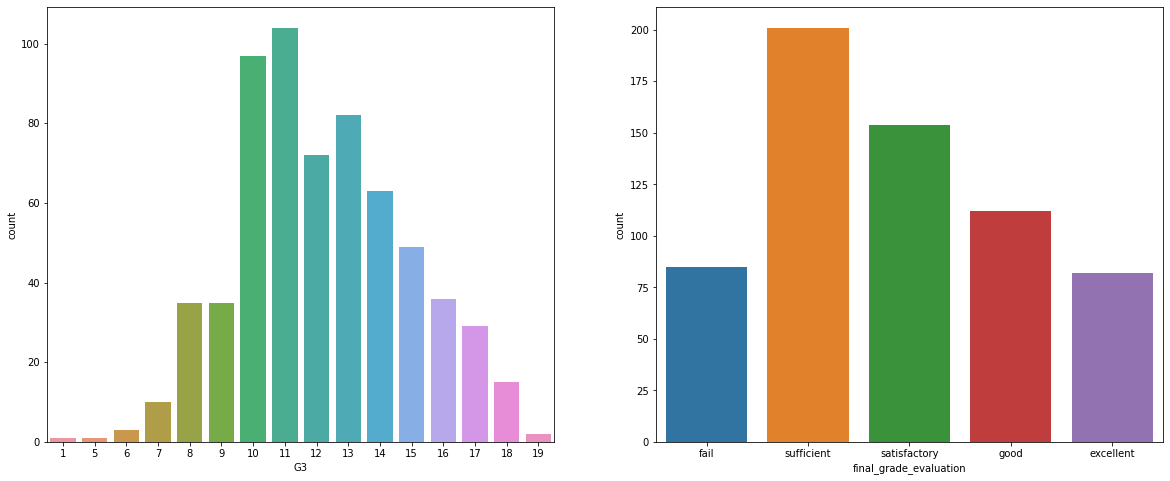

In [ ]:
train_df = df.copy()
outlier_df = df[df['G3'] == 0]
train_df.drop(outlier_df.index, inplace=True)

nrows, ncols = 1, 2
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 8))
sn.countplot(data=train_df, x='final_grade_evaluation', ax=axes[1], order=levels)
sn.countplot(data=train_df, x='G3', ax=axes[0])

# **Feature Extraction**

In [ ]:
y = train_df['final_grade_evaluation']
train_df.drop(['G3'], axis=1, inplace=True)
new_col = 'final_grade_evaluation'

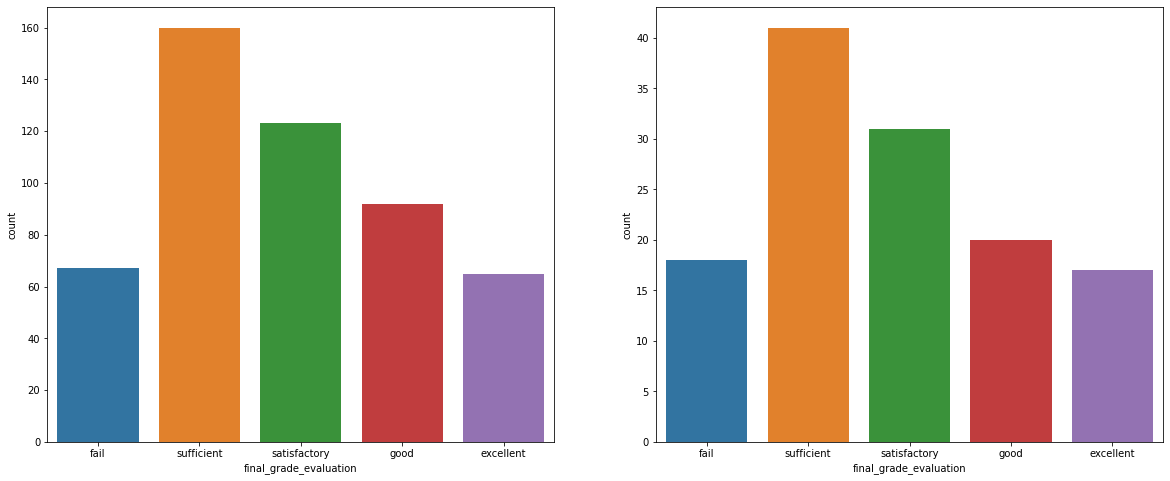

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.20, random_state=170)

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sn.countplot(data=X_train, x=new_col, ax=axes[0], order=levels)
sn.countplot(data=X_test, x=new_col, ax=axes[1], order=levels)

X_train = X_train.drop([new_col], axis=1)
X_test = X_test.drop([new_col], axis=1)

In [ ]:
nominal_columns = ['Mjob', 'Fjob', 'reason', 'guardian']
binary_columns = []

for c in X_train.select_dtypes(include='object').columns:
  if c not in nominal_columns:
    binary_columns.append(c)

ordinal_encoding = OrdinalEncoder()
X_train[binary_columns] = ordinal_encoding.fit_transform(X_train[binary_columns])
X_test[binary_columns] = ordinal_encoding.transform(X_test[binary_columns])
# one_hot_enoding = OneHotEncoder()
# one_hot_enoding.fit_transform(train_df[[nominal_columns]]).toarray()
X_train = pd.get_dummies(X_train, columns=nominal_columns)
X_test = pd.get_dummies(X_test, columns=nominal_columns)

In [ ]:
# CONFIGURATION A
scaled_X_train_a = X_train.copy()
scaled_X_test_a = X_test.copy()
scaler_a = StandardScaler()
scaler_a.fit(scaled_X_train_a)
scaled_X_train_a = scaler_a.transform(scaled_X_train_a)
scaled_X_test_a = scaler_a.transform(scaled_X_test_a)

#CONFIGURATION B
scaled_X_train_b = X_train.copy()
scaled_X_test_b = X_test.copy()
scaled_X_train_b.drop(['G1', 'G2'], axis=1, inplace=True)
scaled_X_test_b.drop(['G1', 'G2'], axis=1, inplace=True)
scaler_b = StandardScaler()
scaler_b.fit(scaled_X_train_b)
scaled_X_train_b = scaler_b.transform(scaled_X_train_b)
scaled_X_test_b = scaler_b.transform(scaled_X_test_b)

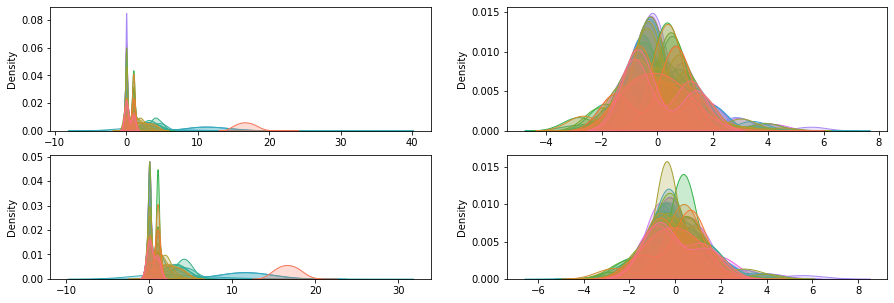

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
sn.kdeplot(data=X_train, ax=axes[0][0], fill=True, bw_adjust=2, legend=False)
sn.kdeplot(data=scaled_X_train_a, ax=axes[0][1], fill=True, bw_adjust=2, legend=False)
sn.kdeplot(data=X_test, ax=axes[1][0], fill=True, bw_adjust=2, legend=False)
sn.kdeplot(data=scaled_X_test_a, ax=axes[1][1], fill=True, bw_adjust=2, legend=False)

In [ ]:
pca = PCA().fit(scaled_X_train_a)
np_cum = np.cumsum(pca.explained_variance_ratio_)
df_cum = pd.DataFrame({'Component':[i for i in range(1,np_cum.shape[0]+1)],'cum_explained_variance_ratio':np_cum})
filter_df = df_cum[df_cum.cum_explained_variance_ratio>=0.8]
component = int(filter_df.Component.iloc[0])
cum_var = float(filter_df.cum_explained_variance_ratio.iloc[0])
print(f'{component} Components capture {round(cum_var,4)*100}% of variability of the data')

25 Components capture 81.64% of variability of the data


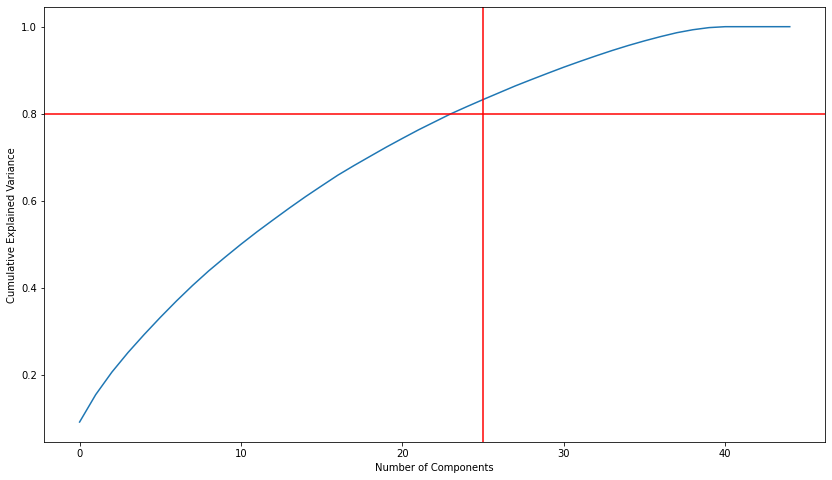

In [ ]:
threshold = 0.8
fig = plt.figure(figsize=(14,8))
plt.plot(df_cum.cum_explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=threshold, color = 'r', linestyle = '-')
plt.axvline(x=component, color = 'r', linestyle = '-')
plt.show()

In [ ]:
pca = PCA(n_components=25)
X_pca = pca.fit_transform(scaled_X_train_a)


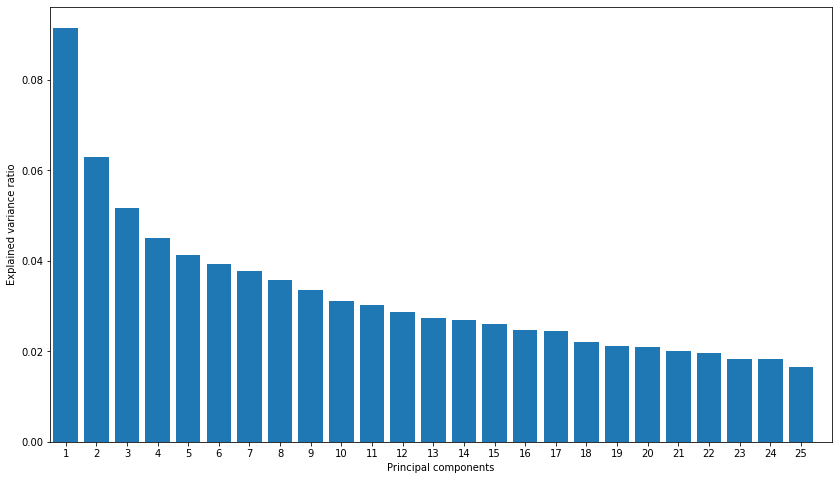

In [ ]:
fig = plt.figure(figsize=(14,8))
plt.bar(range(1,26),pca.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xlim([0.5,26])
plt.xticks(range(1,26))
plt.show()

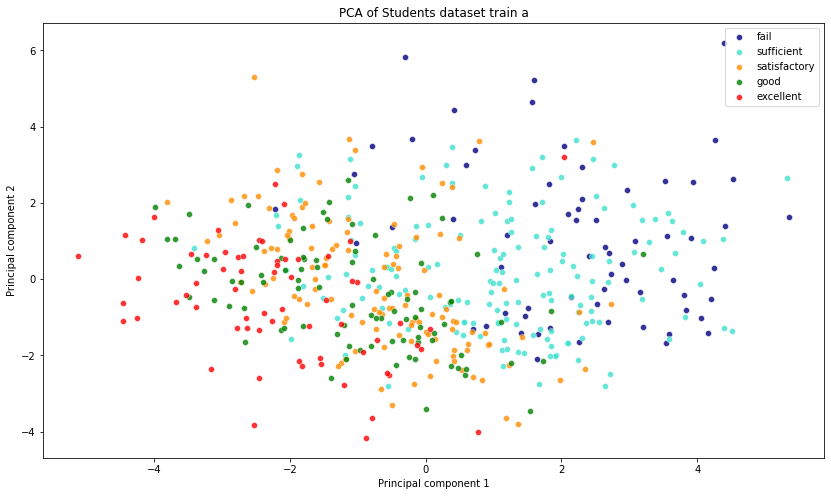

In [ ]:
fig = plt.figure(figsize=(14,8))
colors = ['navy', 'turquoise', 'darkorange','g','r']
y_pl = y_train
for color, i, target_name in zip(colors, levels, levels):
    sn.scatterplot(x=X_pca[y_pl == i, 0], y=X_pca[y_pl == i, 1], alpha=.8, color=color,
                label=target_name).set(title='PCA of Students dataset train a')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

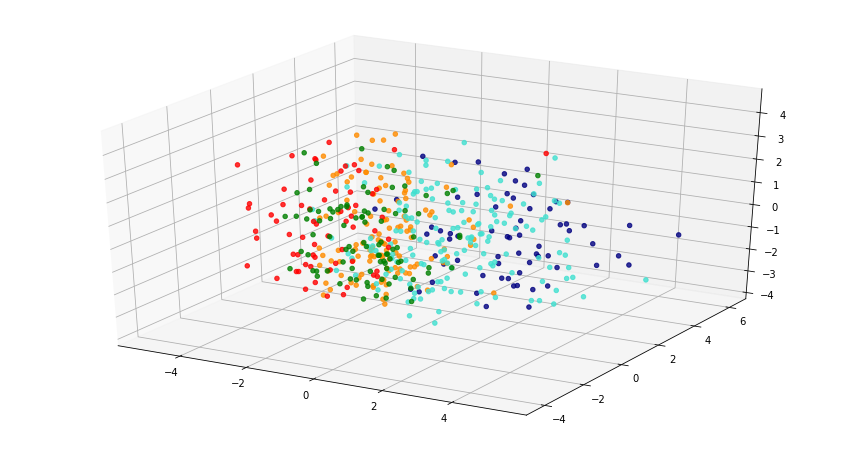

In [ ]:
plt.figure(figsize=(15,8))
axes = plt.axes(projection='3d')
for color, i, target_name in zip(colors, levels, levels):
  axes.scatter3D(xs=X_pca[y_pl == i, 0], ys=X_pca[y_pl == i, 1], zs = X_pca[y_pl == i, 2] , alpha=.8, color=color,
            label=target_name)

In [ ]:
lda = LDA()
X_lda = lda.fit_transform(scaled_X_train_a,y_train)
np_cum_lda = np.cumsum(lda.explained_variance_ratio_)
df_cum_lda = pd.DataFrame({'Component':[i for i in range(1,np_cum_lda.shape[0]+1)],'explained_variance_ratio':lda.explained_variance_ratio_,'cum_explained_variance_ratio':np_cum_lda})
print(df_cum_lda)
filter = df_cum_lda[df_cum_lda.cum_explained_variance_ratio>0.8].iloc[0]
component = int(filter.Component)
cum_var = float(filter.cum_explained_variance_ratio)
print(f"\n{component} Discriminant Components explain {round(cum_var,4)*100}% of variability between CLASSES")

   Component  explained_variance_ratio  cum_explained_variance_ratio
0          1                  0.945053                      0.945053
1          2                  0.034457                      0.979510
2          3                  0.010780                      0.990290
3          4                  0.009710                      1.000000

1 Discriminant Components explain 94.51% of variability between CLASSES


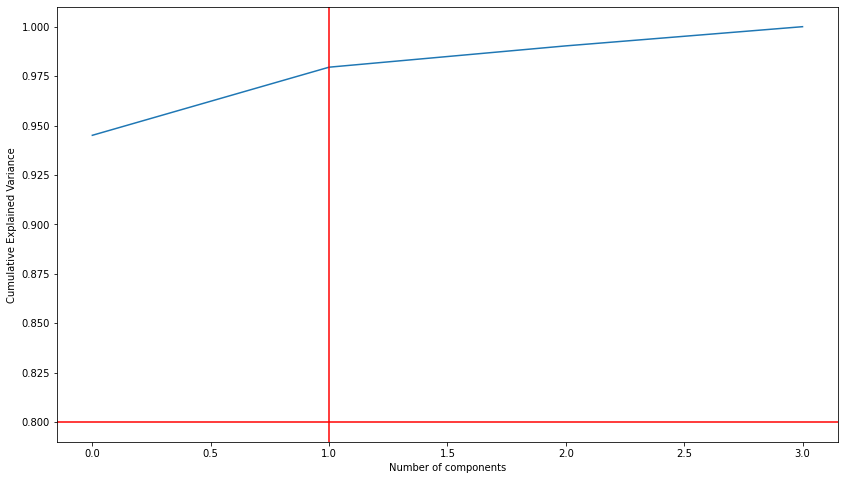

In [ ]:
threshold = 0.8
fig = plt.figure(figsize=(14,8))
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance');
plt.axhline(y=threshold, color = 'r', linestyle = '-')
plt.axvline(x=component, color = 'r', linestyle = '-')
plt.show()

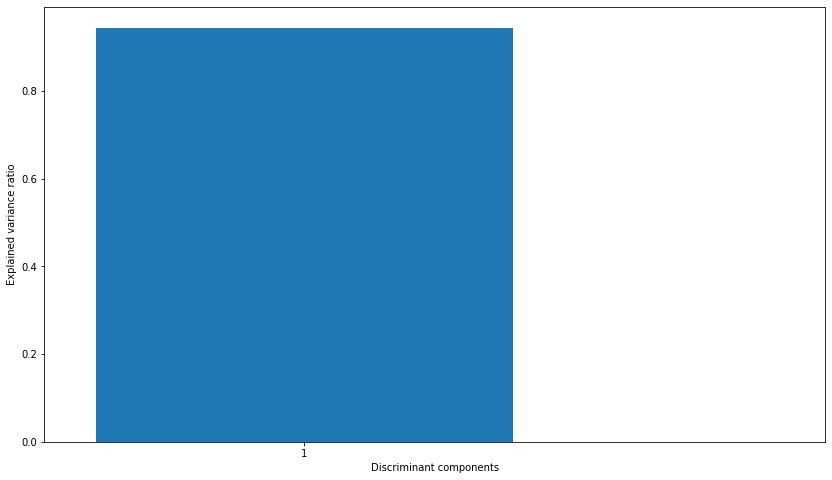

In [ ]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(scaled_X_train_a,y_train)
fig = plt.figure(figsize=(14,8))
plt.bar(range(1,2),lda.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Discriminant components')
plt.xlim([0.5,2])
plt.xticks(range(1,2))
plt.show()

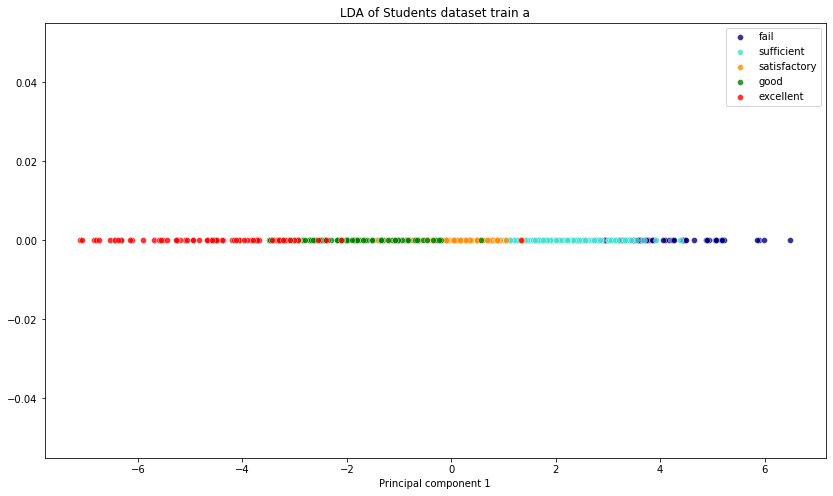

In [ ]:
fig = plt.figure(figsize=(14,8))
colors = ['navy', 'turquoise', 'darkorange','g','r']
y_pl = y_train
for color, i, target_name in zip(colors, levels, levels):
    sn.scatterplot(x=X_lda[y_pl == i, 0], y = 0, alpha=.8, color=color,
                label=target_name).set(title='LDA of Students dataset train a')
plt.xlabel('Principal component 1')
plt.show()

In [ ]:
pca2 = PCA().fit(scaled_X_train_b)
np_cum = np.cumsum(pca2.explained_variance_ratio_)
df_cum = pd.DataFrame({'Component':[i for i in range(1,np_cum.shape[0]+1)],'cum_explained_variance_ratio':np_cum})
filter_df = df_cum[df_cum.cum_explained_variance_ratio>=0.8]
component = int(filter_df.Component.iloc[0])
cum_var = float(filter_df.cum_explained_variance_ratio.iloc[0])
print(f'{component} Components capture {round(cum_var,4)*100}% of variability of the data')

24 Components capture 80.77% of variability of the data


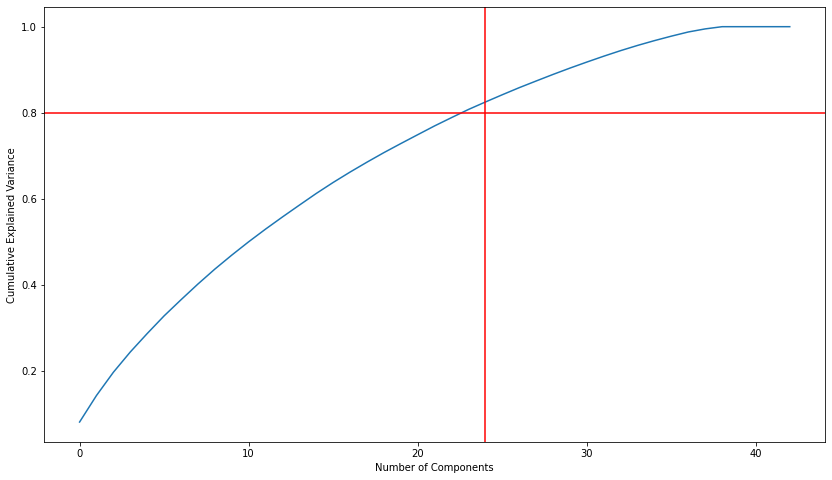

In [ ]:
threshold = 0.8
fig = plt.figure(figsize=(14,8))
plt.plot(df_cum.cum_explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=threshold, color = 'r', linestyle = '-')
plt.axvline(x=component, color = 'r', linestyle = '-')
plt.show()

In [ ]:
pca = PCA(n_components=24)
X_pca_b = pca.fit_transform(scaled_X_train_b)

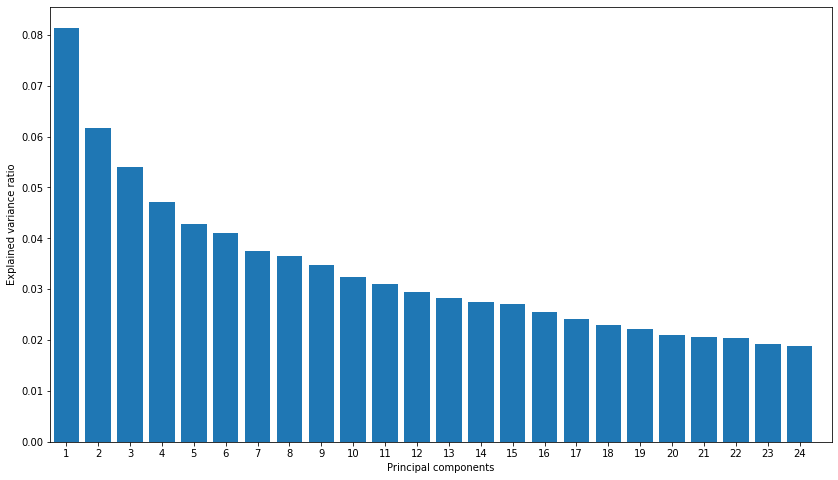

In [ ]:
fig = plt.figure(figsize=(14,8))
plt.bar(range(1,25),pca.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xlim([0.5,25])
plt.xticks(range(1,25))
plt.show()

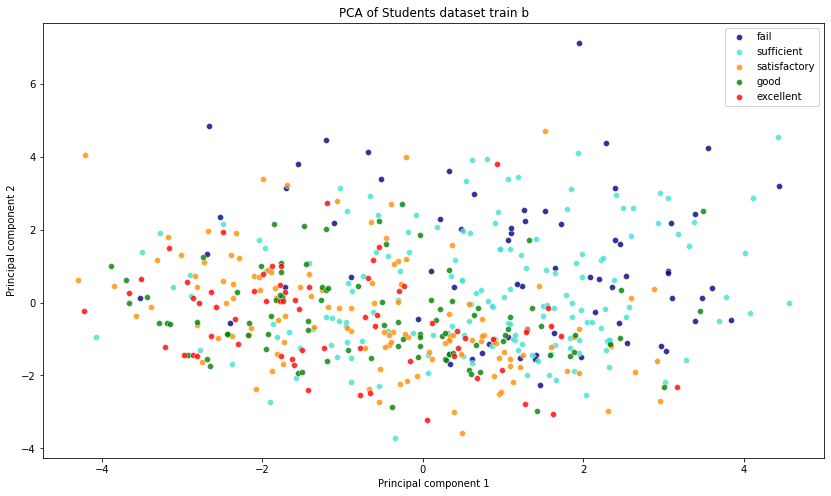

In [ ]:
fig = plt.figure(figsize=(14,8))
colors = ['navy', 'turquoise', 'darkorange','g','r']
y_pl = y_train
for color, i, target_name in zip(colors, levels, levels):
    sn.scatterplot(x=X_pca_b[y_pl == i, 0], y=X_pca_b[y_pl == i, 1], alpha=.8, color=color,
                label=target_name).set(title='PCA of Students dataset train b')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

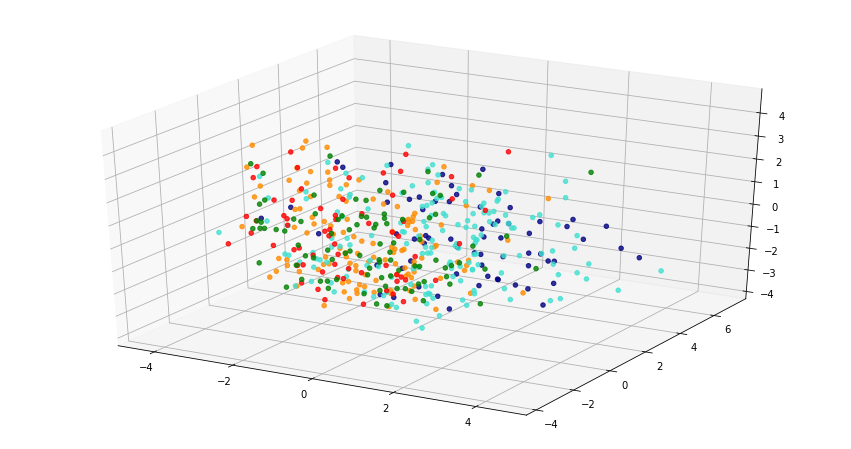

In [ ]:
plt.figure(figsize=(15,8))
axes = plt.axes(projection='3d')
for color, i, target_name in zip(colors, levels, levels):
  axes.scatter3D(xs=X_pca_b[y_pl == i, 0], ys=X_pca_b[y_pl == i, 1], zs = X_pca_b[y_pl == i, 2] , alpha=.8, color=color,
            label=target_name)

In [ ]:
lda2 = LDA()
X_lda_b = lda2.fit_transform(scaled_X_train_b,y_train)
np_cum_lda = np.cumsum(lda2.explained_variance_ratio_)
df_cum_lda = pd.DataFrame({'Component':[i for i in range(1,np_cum_lda.shape[0]+1)],'explained_variance_ratio':lda2.explained_variance_ratio_,'cum_explained_variance_ratio':np_cum_lda})
print(df_cum_lda)
filter = df_cum_lda[df_cum_lda.cum_explained_variance_ratio>0.8].iloc[0]
component = int(filter.Component)
cum_var = float(filter.cum_explained_variance_ratio)
print(f"\n{component} Discriminant Components explain {round(cum_var,4)*100}% of variability between CLASSES")

   Component  explained_variance_ratio  cum_explained_variance_ratio
0          1                  0.738397                      0.738397
1          2                  0.132868                      0.871265
2          3                  0.067190                      0.938455
3          4                  0.061545                      1.000000

2 Discriminant Components explain 87.13% of variability between CLASSES


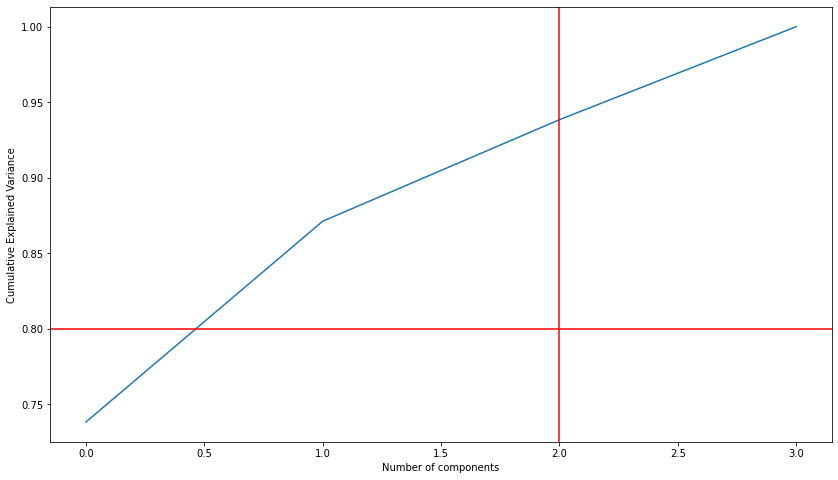

In [ ]:
threshold = 0.8
fig = plt.figure(figsize=(14,8))
plt.plot(np.cumsum(lda2.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance');
plt.axhline(y=threshold, color = 'r', linestyle = '-')
plt.axvline(x=component, color = 'r', linestyle = '-')
plt.show()

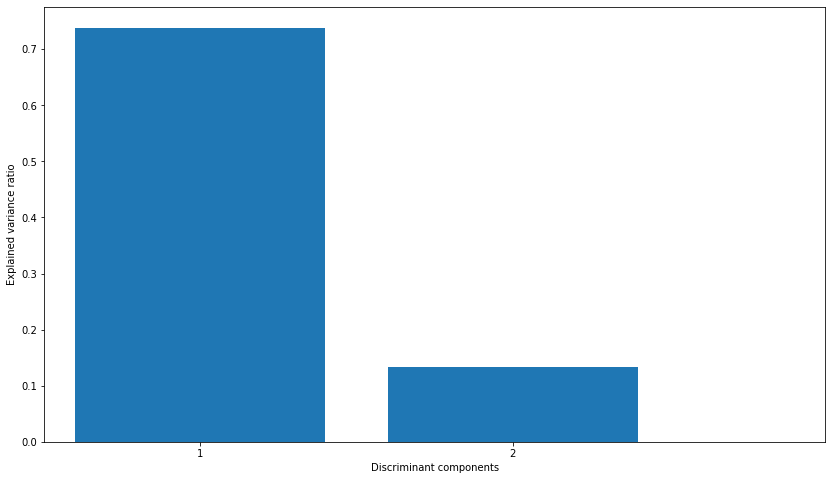

In [ ]:
lda = LDA(n_components=2)
X_lda_b = lda.fit_transform(scaled_X_train_b,y_train)
fig = plt.figure(figsize=(14,8))
plt.bar(range(1,3),lda.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Discriminant components')
plt.xlim([0.5,3])
plt.xticks(range(1,3))
plt.show()

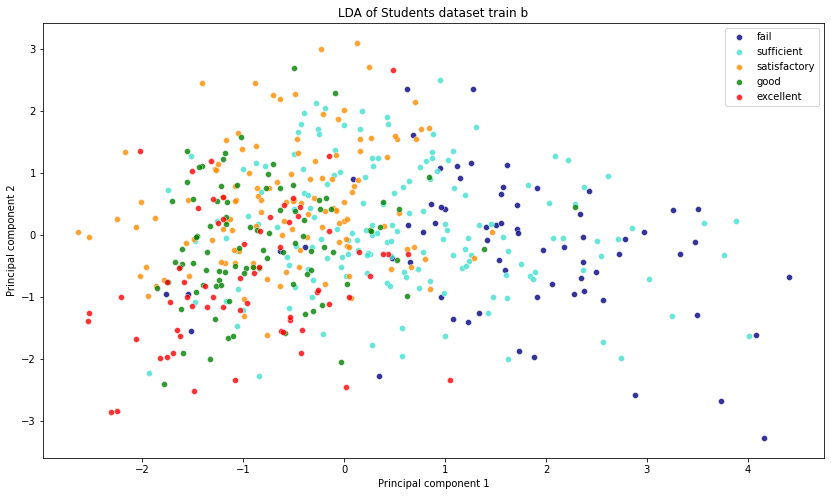

In [ ]:
fig = plt.figure(figsize=(14,8))
colors = ['navy', 'turquoise', 'darkorange','g','r']
y_pl = y_train
for color, i, target_name in zip(colors, levels, levels):
    sn.scatterplot(x=X_lda_b[y_pl == i, 0], y = X_lda_b[y_pl == i, 1] , alpha=.8, color=color,
                label=target_name).set(title='LDA of Students dataset train b')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

# **Classification**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from numpy import mean
from numpy import std
import graphviz

To NOT apply LDA it's enough to comment this cell

In [ ]:
lda = LDA(n_components = 1)
lda.fit(scaled_X_train_a, y_train)

scaled_X_train_a= lda.transform(scaled_X_train_a)
scaled_X_test_a = lda.transform(scaled_X_test_a)


lda = LDA(n_components=2)
lda.fit(scaled_X_train_b, y_train)

scaled_X_train_b= lda.transform(scaled_X_train_b)
scaled_X_test_b = lda.transform(scaled_X_test_b)

In [ ]:
train_accuracy_a=[]
train_accuracy_b = []
test_accuracy_a = []
test_accuracy_b = []

## **Logistic Regression**

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=1)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores_a = cross_val_score(model, scaled_X_train_a, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
n_scores_b = cross_val_score(model, scaled_X_train_b, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

Mean Accuracy: 0.767 (0.038)
Acuracy
0.7165354330708661
Recall
[0.61111111 0.92682927 0.51612903 0.65       0.76470588]
0.69375505880296
Precision
[1.         0.76       0.64       0.48148148 0.92857143]
0.762010582010582
F1
[0.75862069 0.83516484 0.57142857 0.55319149 0.83870968]
0.7114230526059272


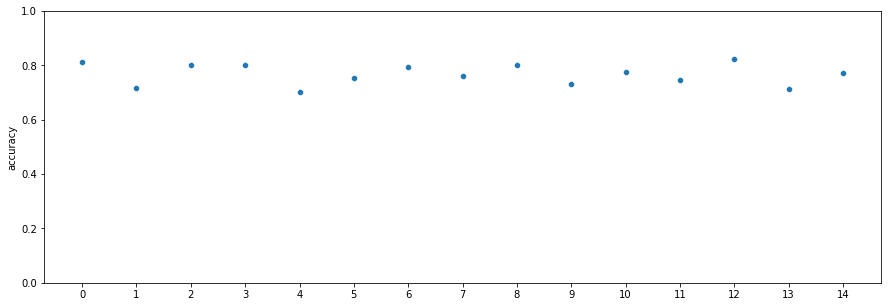

In [ ]:
model.fit(scaled_X_train_a, y_train)
y_pred = model.predict(scaled_X_test_a)
train_accuracy_a.append(mean(n_scores_a)*100)
test_accuracy_a.append(accuracy_score(y_test, y_pred)*100)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores_a), std(n_scores_a)))
print("Acuracy")
print(accuracy_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("Precision")
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("F1")
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sn.scatterplot(data=n_scores_a, ax=axes)
axes.set_ylim(0, 1)
axes.set_ylabel('accuracy')
axes.set_xticks(range(0, 15))

Mean Accuracy: 0.448 (0.051)
Acuracy
0.30708661417322836
Recall
[0.11111111 0.48780488 0.48387097 0.05       0.05882353]
0.23832209726271839
Precision
[0.4        0.38461538 0.3        0.07692308 0.14285714]
0.2608791208791209
F1
[0.17391304 0.43010753 0.37037037 0.06060606 0.08333333]
0.2236660669339491


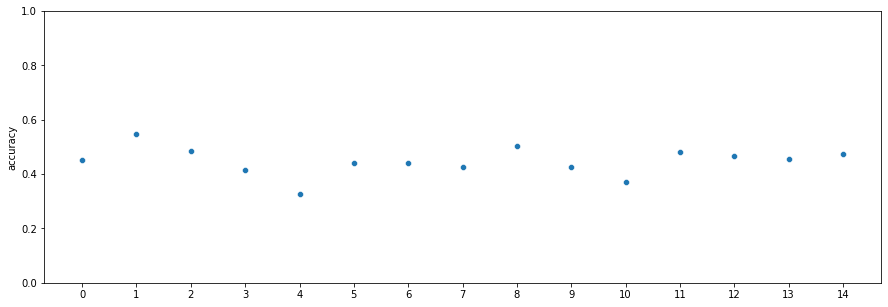

In [ ]:
model.fit(scaled_X_train_b, y_train)
y_pred = model.predict(scaled_X_test_b)
train_accuracy_b.append(mean(n_scores_b)*100)
test_accuracy_b.append(accuracy_score(y_test, y_pred)*100)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores_b), std(n_scores_b)))
print("Acuracy")
print(accuracy_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("Precision")
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("F1")
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sn.scatterplot(data=n_scores_b, ax=axes)
axes.set_ylim(0, 1)
axes.set_ylabel('accuracy')
axes.set_xticks(range(0, 15))

## **Support Vector Machine**

In [ ]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]}
svc = svm.SVC()
clf_a = GridSearchCV(svc, parameters)
clf_a.fit(scaled_X_train_a, y_train)
print(clf_a.best_params_)
print(clf_a.best_score_)

print("##################################")

clf_b = GridSearchCV(svc, parameters)
clf_b.fit(scaled_X_train_b, y_train)
print(clf_b.best_params_)
print(clf_b.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.7829741797709182
##################################
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.45162104445738693


In [ ]:
train_accuracy_a.append(clf_a.best_score_*100)
train_accuracy_b.append(clf_b.best_score_*100)


In [ ]:
svc_a = svm.SVC(kernel='rbf', C=10, gamma=0.1)
svc_a.fit(scaled_X_train_a, y_train)
y_pred = svc_a.predict(scaled_X_test_a)
test_accuracy_a.append(accuracy_score(y_test, y_pred)*100)
print("Acuracy")
print(accuracy_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("Precision")
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("F1")
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))

Acuracy
0.7480314960629921
Recall
[0.61111111 0.92682927 0.67741935 0.6        0.76470588]
0.716013123319089
Precision
[1.         0.76       0.65625    0.6        0.92857143]
0.7889642857142857
F1
[0.75862069 0.83516484 0.66666667 0.6        0.83870968]
0.7398323737812059


In [ ]:
svc_b = svm.SVC(kernel='rbf', C=1000, gamma=0.1)
svc_b.fit(scaled_X_train_b, y_train)
y_pred = svc_b.predict(scaled_X_test_b)
test_accuracy_b.append(accuracy_score(y_test, y_pred)*100)
print("Acuracy")
print(accuracy_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("Precision")
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("F1")
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))

Acuracy
0.33070866141732286
Recall
[0.22222222 0.51219512 0.41935484 0.15       0.05882353]
0.27251914245897674
Precision
[0.5        0.41176471 0.30952381 0.15       0.16666667]
0.30759103641456587
F1
[0.30769231 0.45652174 0.35616438 0.15       0.08695652]
0.27146699042470335


## **K-Nearest Neighbors**

In [ ]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': list(range(1, 101))}

model_a = GridSearchCV(knn, parameters)
model_a.fit(scaled_X_train_a, y_train)
print(model_a.best_params_)
print(model_a.best_score_)

model_b = GridSearchCV(knn, parameters)
model_b.fit(scaled_X_train_b, y_train)
print(model_b.best_params_)
print(model_b.best_score_)

{'n_neighbors': 45}
0.7869345758105222
{'n_neighbors': 27}
0.4753057658707047


In [ ]:
train_accuracy_a.append(model_a.best_score_*100)
train_accuracy_b.append(model_b.best_score_*100)


In [ ]:
knn_a = KNeighborsClassifier(n_neighbors=45)
knn_a.fit(scaled_X_train_a, y_train)
y_pred = knn_a.predict(scaled_X_test_a)
test_accuracy_a.append(accuracy_score(y_test, y_pred)*100)
print("Acuracy")
print(accuracy_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("Precision")
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("F1")
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))

Acuracy
0.7480314960629921
Recall
[0.61111111 0.92682927 0.67741935 0.6        0.76470588]
0.716013123319089
Precision
[1.         0.76       0.65625    0.6        0.92857143]
0.7889642857142857
F1
[0.75862069 0.83516484 0.66666667 0.6        0.83870968]
0.7398323737812059


For testing B is enough to change the parameters passed to the functions with B ones

In [ ]:
knn_b = KNeighborsClassifier(n_neighbors=27)
knn_b.fit(scaled_X_train_b, y_train)
y_pred = knn_b.predict(scaled_X_test_b)
test_accuracy_b.append(accuracy_score(y_test, y_pred)*100)
print("Acuracy")
print(accuracy_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("Precision")
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("F1")
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))

Acuracy
0.28346456692913385
Recall
[0.22222222 0.36585366 0.35483871 0.25       0.05882353]
0.25034762396959837
Precision
[0.36363636 0.39473684 0.28205128 0.18518519 0.08333333]
0.2617886012622855
F1
[0.27586207 0.37974684 0.31428571 0.21276596 0.06896552]
0.25032521867649143


## **Tree-based Methods**

Setup train and test for Configuration A and B using the original train and test subset

In [ ]:

X_train_a = X_train.copy()
X_test_a=X_test.copy()
X_train_b = X_train.copy()
X_test_b = X_test.copy()
X_train_b.drop(['G1', 'G2'], axis=1, inplace=True)
X_test_b.drop(['G1', 'G2'], axis=1, inplace=True)


### **Decision Tree**

In [ ]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1, 30)), 'min_samples_split':list(range(2, 30))}


model = tree.DecisionTreeClassifier()

gsa = GridSearchCV(model, parameters)
gsa.fit(X_train_a, y_train)
print(gsa.best_params_)
print(gsa.best_score_)
print("##################################")
gsb = GridSearchCV(model, parameters)
gsb.fit(X_train_b, y_train)
print(gsb.best_params_)
print(gsb.best_score_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
0.7455833818675984
##################################
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 29}
0.4535818287711124


In [ ]:
train_accuracy_a.append(gsa.best_score_*100)
train_accuracy_b.append(gsb.best_score_*100)


In [ ]:
# model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2)
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=2)
model.fit(X_train_a, y_train)
y_pred = model.predict(X_test_a)
test_accuracy_a.append(accuracy_score(y_test, y_pred)*100)
print("Acuracy")
print(accuracy_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("Precision")
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("F1")
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))

# dot_data = tree.export_graphviz(model, out_file=None, 
#                       # feature_names=X_train_a.columns,
#                       class_names=['excellent', 'fail', 'good', 'satisfactory', 'sufficient'],  
#                       filled=True, rounded=True,  
#                       special_characters=True,
#                       max_depth=4)  
# graph = graphviz.Source(dot_data)
# # graph.format = 'png'
# # graph.render('b_tree')
# graph

In [ ]:
# model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=12)
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=29)
model.fit(X_train_b, y_train)
y_pred = model.predict(X_test_b)
test_accuracy_b.append(accuracy_score(y_test, y_pred)*100)
print("Acuracy")
print(accuracy_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("Precision")
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("F1")
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))

# dot_data = tree.export_graphviz(model, out_file=None, 
#                       # feature_names=X_train_b.columns,
#                       class_names=['excellent', 'fail', 'good', 'satisfactory', 'sufficient'],  
#                       filled=True, rounded=True,  
#                       special_characters=True,
#                       max_depth=4)  
# graph = graphviz.Source(dot_data)
# # graph.format = 'png'
# # graph.render('b_tree')
# graph

### **Random Forest**

In [ ]:
parameters = {'criterion':['gini', 'entropy'],
              'n_estimators':list(range(10, 101, 10)), 
              'max_features':['sqrt', 'log2'], 
              'max_depth':list(range(1, 30)), 
              'min_samples_split':list(range(2, 30))
            }

model = RandomForestClassifier()
rsa = GridSearchCV(model, parameters)
rsa.fit(X_train_a, y_train)
print(rsa.best_params_)
print(rsa.best_score_)
print("##################################")
rsb = GridSearchCV(model, parameters)
rsb.fit(X_train_b, y_train)
print(rsb.best_params_)
print(rsb.best_score_)

In [ ]:
train_accuracy_a.append(rsa.best_score_*100)
train_accuracy_b.append(rsb.best_score_*100)


In [ ]:
# model = RandomForestClassifier(criterion='gini', max_depth=9, min_samples_split=6, max_features='sqrt', n_estimators=60)
model = RandomForestClassifier(criterion='gini', max_depth=3, min_samples_split=3, max_features='log2', n_estimators=30)
model.fit(X_train_a, y_train)
y_pred = model.predict(X_test_a)
test_accuracy_a.append(accuracy_score(y_test, y_pred)*100)
print("Acuracy")
print(accuracy_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("Precision")
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("F1")
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))

In [ ]:
# model = RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=6, max_features='log2', n_estimators=70)
model = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=2, max_features='log2', n_estimators=10)
model.fit(X_train_b, y_train)
y_pred = model.predict(X_test_b)
test_accuracy_b.append(accuracy_score(y_test, y_pred)*100)
print("Acuracy")
print(accuracy_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(recall_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("Precision")
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(precision_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))
print("F1")
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average=None))
print(f1_score(y_test, y_pred, labels=['fail', 'sufficient', 'satisfactory', 'good', 'excellent'], average="macro"))

In [ ]:
models = ['Logistic regression', 'SVM', 'Knn', 'Decision tree', 'Random forest']

d = {'model':models,
     'train_accuracy_a': train_accuracy_a,
     'train_accuracy_b': train_accuracy_b,
     'test_accuracy_a': test_accuracy_a,
     'test_accuracy_b': test_accuracy_b}

pl = pd.DataFrame(d)

_, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 8))
sn.barplot(data=pl, x='train_accuracy_a',
            y='model', orient='h', ax=ax[0][0])
ax[0][0].set_xlim([0, 100])
sn.barplot(data=pl, x='test_accuracy_a',
            y='model', orient='h', ax=ax[1][0])
ax[1][0].set_xlim([0, 100])
sn.barplot(data=pl, x='train_accuracy_b',
            y='model', orient='h', ax=ax[0][1])
ax[0][1].set_xlim([0, 100])
sn.barplot(data=pl, x='test_accuracy_b',
            y='model', orient='h', ax=ax[1][1])
ax[1][1].set_xlim([0, 100])